## The Stationarity vs Memory Dilemma

금융에서는 비정상성 시계열을 흔히 보곤 한다. 이런 시계열을 비정상성이 되게 만드는 것은 memory의 존재, 즉 시계열의 평균을 시간의 흐름에 따라서 변하게 하는 긴 history의 과거 수준이다. 연구자들이 추론 분석을 수행할 경우 가격 수익률, 채권 수익률 변화분, 변동성 변화분 등과 같이 시간의 흐름에 따라 변하지 않는 정상성을 가진 프로세스로 작업해야 한다. 이런식의 데이터 변환은 시계열 데이터를 정상성을 가지도록 만들지만, 원시계열에 있는 모든 memory를 없애 버린다. 비록 정상성은 추론의 목적에서는 필요하지만, 신호 처리 관점에서는 모든 기억이 사라지는 것을 바라지는 않는다. 그 이유는 memory가 모델 예측력의 기반이기 때문이다.

예를 들어서, 정상성이 있는 모델을 활용해 예측 작업을 수행하고자 가격 프로세스가 장기 기대 가격보다 얼마나 벗어났는지 확인하기 위해서는 어느 정도의 memory가 필요하다. 문제는 '수익률은 memory가 없고 stationary하지만, 가격 데이터는 memory는 있고 non-stationary 하다는 것이다. 여기서 질문은 '기억을 최대한 보존하면서 가격 시계열을 stationary하게 만들 수 있는 가장 작은 차분계수의 값은 얼마인가?'이다. 차분의 개념을 일반화하여 memory 전체가 지워지지 않는 stationary한 시계열로 간주한다. 이런 틀에서 보면, 수익률이란 그저 가격을 변환하는 여러 가능한 방법 중 하나일 뿐이라는 것을 깨닫게 된다.

Cointegration이 중요한 이유 중 하나는 memory를 보존한 채로 시계열을 모델링할 수 있게 하는 능력 때문이다. 그러나, 0차 차분과 같이 특수한 경우가 최고의 결과를 내는 것은 무엇 때문일까? 0차 차분은 1차 차분만큼 임의적이다. 두 차분값 사이에는 넓은 간극이 존재하기 때문에, 고도의 예측 능력을 가진 Machine learning 모형을 만들기 위해서는 fractional calculus를 통해 이 부분을 탐구해야 한다.

지도학습 알고리즘은 대개 정상성 가정이 필요하다. 그 이유는 테스트 데이터에 있어서 labeling된 예제의 집합으로 mapping할 필요가 있기 때문이며, 이로부터 새로운 관측값의 label을 추론하고자 하기 때문이다. 특성이 정상성 가정을 따르지 않는다면, 새로운 관측값을 대규모의 알려진 예제에 매핑할 수 없다. 그러나 정상성이 예측력을 보장해 주지는 않난다. 정상성은 고성능 머신러닝 알고리즘을 위한 필요조건이지만 충분조건은 아니다. 문제는 정상성과 memory사이에 trade off 관계가 있다는 점이다. 차분을 통해 계열이 항상 정상성을 가지도록 할 수 있지만, 그럴수록 특정 memory가 지워지고 머신러닝 알고리즘이 예측하고자 하는 목적성을 해치게 된다. 이번 장에서는 이런 딜레마를 해결하는 방법을 연구해 본다.

## Literature Review



## Methodology

실수값인 feature $\{X_t\}$에 적용한 backshift 연산자 $B$를 가정해 보자. 여기서 $k \geq 0$인 모든 정수에 대해 $B^kX_t = X_{t-k}$이다. 양의 정수 $n$에 $(x+y)^n = \sum_{k=0}^n {n \choose k} x^k y^{n-k} = \sum_{k=0}^n {n \choose k}x^{n-k}k^k$라는 것에 주목하자. 실수 $d$에서 $(1+x)^d = \sum_{k=0}^\infty {d \choose k} x^k$ 즉, 이항 계열이다. Fractionally differentiated model에서 지수 $d$는 실수값이 가능하고, 다음 형식의 이항 계열 확장을 따른다

$$\begin{matrix}
(1-B)^d = \sum_{k=0}^\infty {d \choose k}(-B)^k &=& \sum_{k=0}^\infty \frac{\prod_{i=0}^{k-1}(d-i)}{k!} \\
       &=& \sum_{k=0}^\infty (-B)^k \prod_{i=0}^{k-1}\frac{d-i}{k-i} \\
       &=& 1 - dB + \frac{d(d-1)}{2!}B^2 - \frac{d(d-1)(d-2)}{3!}B^3 + \cdots
\end{matrix}$$

### Long Memory

양의 실수 $d$가 기억을 유지하는 법을 알아보도록 하자. 아래의 산술 계열은 내적으로 이뤄져 있다

$$\tilde X_t = \sum_{k=0}^\infty \omega_k X_{t-k}$$

여기서 가중값 $\omega$는

$$\omega = \Big\{
1, -d, \frac{d(d-1)}{2!}, -\frac{d(d-1)(d-2)}{3!}, \cdots, (-1)^k \prod_{i=0}^{k-1} \frac{d-i}{k!}, \cdots
\Big\}$$

그리고 값 $X$는

$$X = \{X_t, X_{t-1}, X_{t-2}, X_{t-3}, \dots, X_{t-k}, \dots\}$$

이다.

$d$가 양의 정수일 때 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>d$이고, 이 지점을 넘어선 market memory는 소멸된다. 예를들어, $d=1$일 경우 수익률을 계산하기 위해 사용하는 차분계수이다. 여기서 $\prod_{i=0}^{k-1} \frac{d-i}{k!} = 0, \forall k>1$이고 $\omega = \{1,-1,0,0,\cdots \}$이다

### Iterative Estimation

가중값 $\omega$의 sequence를 살펴보면 $\omega_0 = 1$이고, $k = 0, \dots, \infty$에 대해서 가중값은 반복적으로 다음과 같이 생성된다.

$$\omega_k = -\omega_{k-1}\frac{d-k+1}{k}$$
 
아래의 그림은 각 fractional difference 계열의 값을 계산하고자 사용된 가중값의 시퀀스를 나타낸 것이다. 범례는 각 시퀀스를 생성하고자 사용된 $d$값을 보여주고, $x$축은 $k$값, $y$축은 $\omega_k$값을 보여 준다. 예를 들어, $d=0$에 대해서 모든 가중값은 $\omega_0=1$과 $\omega_1=-1$을 제외하고는 모두 0이다. 이는 표준 1차 차분으로 로그 가격 수익률을 구할 때 사용된다. 이 두 경우 중간에서는 $\omega_0 = 1$다음의 모든 가중값은 음수이고, -1보다 크다.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_weights(d, size) :
    # thres > 0 유의미하지 않은 가중값을 제거
    w = [1.]
    for k in range(1, size) :
        w_ = -w[-1] / k * (d - k + 1)
        w.append(w_)
    w = np.array(w[::-1]).reshape(-1, 1)
    return w

def plot_weights(d_range, n_plots, size) :
    w = pd.DataFrame()
    for d in np.linspace(d_range[0], d_range[1], n_plots) :
        w_ = get_weights(d, size)
        w_ = pd.DataFrame(w_, index = range(w_.shape[0])[::-1], columns = [d])
        w = w.join(w_, how = 'outer')
    ax = w.plot()
    plt.grid(False)
    ax.legend(loc = 'upper right')
    return None

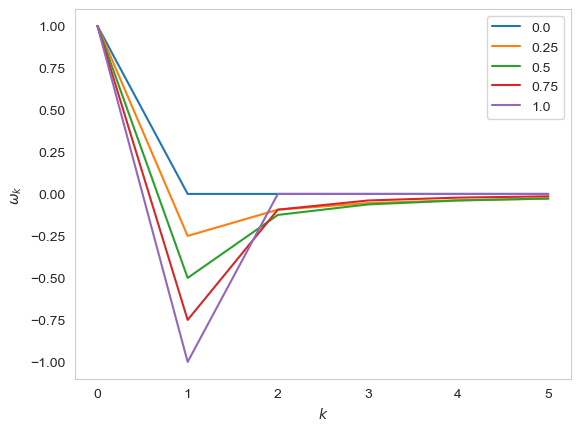

In [18]:
plot_weights(d_range = [0, 1], n_plots = 5, size = 6)
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_k$')
plt.show()

아래의 그림은 $d \in [1, 2]$의 가중값 시퀀스를 0.25씩 증가시키며 그린 것이다. $d > 1$에 대해서 $\omega_1 < -1$이고 $\omega_k > 0$, $\forall k \geq 2$라는 것을 관찰할 수 있다.

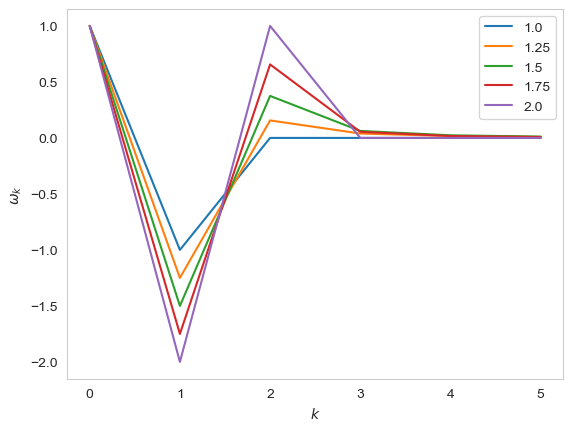

In [19]:
plot_weights(d_range = [1, 2], n_plots = 5, size = 6)
plt.xlabel(r'$k$')
plt.ylabel(r'$\omega_k$')
plt.show()

### Convergence

이번에는 가중값의 수렴을 고려해 보자. 앞의 결과로부터 $k > d$이면 $\omega_{k-1} \neq 0$일 경우에 $\left\vert \frac{\omega_k}{\omega_{k-1}} \right\vert = \left \vert \frac{d-k+1}{k} \right\vert < 1$이고, 그렇지 않은 경우에는 $\omega_k = 0$이다. 그 결과 가중값은 단위 원 안의 인자들의 무한한 곱으로서 0에 점근적으로 수렴한다. 또한 양의 $d$와 $k < d + 1$에 대해 $\frac{d-k+1}{k} \geq 0$이고, 이는 초기 가중값의 부호가 서로 바뀌도록 한다. 정수가 아닌 $d$에 대해 $k \geq d + 1$이면 $\omega_k$는 $\mathrm{int}(d)$가 짝수일 때 음수가 되고, 홀수이면 양수가 된다.

요약하자면, $\mathrm{int}(d)$가 짝수이면 $\lim_{k \rightarrow \infty} \omega_k = 0^{-}$이고, 홀수이면 $\lim_{k \rightarrow \infty} \omega_k = 0^{+}$이다. 특수한 경우 $d \in (0,1)$은 $-1 < \omega_k < 0, \forall k > 0$을 의미한다. 이 가중값 부호가 교대로 바뀌는 것은 $\{ \tilde{X}t \}_{t = 1, \dots, T}$를 정상성이 있는 상태로 만드는 데 필요하다. 이는 기억이 장기에 걸쳐 상쇄되면서 감퇴되기 때문이다.